# Lab 11: Sorting

## <font color=DarkRed>Your Exercise: Analyse Sorting Algorithms.</font>

Using random number generation (as I have done in class) use timing analysis to compare Bubblesort, InsertionSort, Selectionsort, Shellsort, Mergesort, Quicksort.

This will require lists larger than 500 to get good timings. Adjust for your computer's capabilities. Provide meaningful plots of these results using Matplotlib.

## <font color=green>Your Solution</font>

*Use a variety of code, Markdown (text) cells below to create your solution. Nice outputs would be timing results, and even plots. You will be graded not only on correctness, but the clarity of your code, descriptive text and other output. Keep it succinct!*

In [72]:
# Define Bubble_sort 
def bubble_sort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i]=alist[i+1]
                alist[i+1]=temp

In [73]:
# Define insertion sort 
def insertion_sort(alist):
    for index in range(1, len(alist)):
        current_value = alist[index]
        position = index
        
        while position > 0 and alist[position-1] > current_value:
            alist[position] = alist[position - 1]
            position = position-1
            
        alist[position] = current_value

In [74]:
# Define Merge sort 
def merge_sort(alist):
    #print("Splitting ", alist)
    
    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i = 0
        j = 0
        k = 0
        
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i += 1
            else:
                alist[k] = righthalf[j]
                j += 1
                
            k += 1
                
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i += 1
            k += 1
            
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j += 1
            k += 1

In [75]:
# Define selection sort 
def selection_sort(alist):
    for fillslot in range(len(alist)-1, 0, -1):
        position_of_max = 0
        
        for location in range(1, fillslot+1):
            if alist[location] > alist[position_of_max]:
                position_of_max = location
                
        temp = alist[fillslot]
        alist[fillslot] = alist[position_of_max]
        alist[position_of_max] = temp

In [76]:
# Define shell sort 
def shell_sort(alist):
    gap = 2
    sublistcount = len(alist)//gap  # "gap" == 2
    
    while sublistcount > 0:
        for startposition in range(sublistcount):
            gap_insertion_sort(alist, startposition, sublistcount)
        
        if len(alist) <= 15:
            print("After increments of size", sublistcount, "The list is", alist)
        
        sublistcount = sublistcount // gap
        
def gap_insertion_sort(alist, start, gap):
    for i in range(start+gap, len(alist), gap):
        current_value = alist[i]
        position = i
        
        while (position >= gap and
               alist[position-gap] > current_value):
               
                alist[position] = alist[position-gap]
                position = position - gap
                
        alist[position] = current_value

In [77]:
# Define quick sort 
def quick_sort(alist):
    quick_sort_helper(alist, 0, len(alist)-1)
    
def quick_sort_helper(alist, first, last):
    if first < last:
        splitpoint = partition(alist, first, last)
        
        quick_sort_helper(alist, first, splitpoint-1)
        quick_sort_helper(alist, splitpoint+1, last)
        
def partition(alist, first, last):
    pivotvalue = alist[first]
    
    leftmark = first+1
    rightmark = last
    
    done = False
    
    while not done:
        while (leftmark <= rightmark and
               alist[leftmark] <= pivotvalue):
            leftmark += 1
            
        while (rightmark >= leftmark and
               alist[rightmark] >= pivotvalue):
            rightmark -= 1
            
        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp
            
    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp
    
    return rightmark

## Ploting the Sorting Time

In [78]:
from random import choices

In [90]:
# Time different sorting algorithm
import timeit
import copy

# Build the dictionary in order to plot the sorting algorithm 
bubble_times = dict()
insert_times = dict()
select_times = dict()
shell_times = dict()
merge_times = dict()
quick_times =dict()

# set the range for n size numbers 
for n in range(500, 3000, 100):
    nums = choices(range(2_000_000),k = n)
    
# Time each sorting algorithm with the same unsorted list 
    bubble_nums = copy.deepcopy(nums)
    bubble_t = timeit.Timer("bubble_sort(nums)", globals={"bubble_sort":bubble_sort,"nums": bubble_nums})
    bubble_times[n] = bubble_t.timeit(1) # Append n size as key and time as value to the dictionary
    
                                                          
    insert_nums = copy.deepcopy(nums)
    insert_t = timeit.Timer("insertion_sort(nums)", globals={"insertion_sort":insertion_sort,"nums": insert_nums})
    insert_times[n] = insert_t.timeit(1)
    
    select_nums = copy.deepcopy(nums)
    select_t = timeit.Timer("selection_sort(nums)", globals={"selection_sort":selection_sort,"nums": select_nums})
    select_times[n]= select_t.timeit(1)
    
    shell_nums = copy.deepcopy(nums)
    shell_t = timeit.Timer("shell_sort(nums)", globals={"shell_sort":shell_sort,"nums": shell_nums})
    shell_times[n]= shell_t.timeit(1)
    
    merge_nums = copy.deepcopy(nums)
    merge_t = timeit.Timer("merge_sort(nums)", globals={"merge_sort":merge_sort,"nums": merge_nums})
    merge_times[n]= merge_t.timeit(1)
    
    quick_nums = copy.deepcopy(nums)
    quick_t = timeit.Timer("quick_sort(nums)", globals={"quick_sort":quick_sort,"nums": quick_nums})
    quick_times[n]= quick_t.timeit(1)


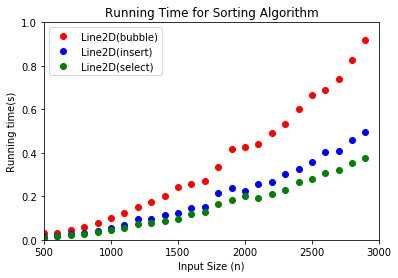

In [96]:
# Plot the running time for sorting algorithm with O(n**2)
import matplotlib.pyplot as plt

l1,=plt.plot(bubble_times.keys(), bubble_times.values(), 'ro',label="bubble")
l2,=plt.plot(insert_times.keys(),insert_times.values(), 'bo',label="insert")
l3,=plt.plot(select_times.keys(), select_times.values(), 'go',label="select")

plt.axis([500,3000,0,1])
plt.title("Running Time for Sorting Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l1,l2,l3])
plt.show()

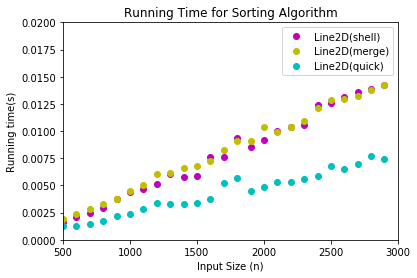

In [95]:
# Plot the running time for sorting algorithm with O(nlogn)
l4,=plt.plot(shell_times.keys(), shell_times.values(), 'mo',label="shell")
l5,=plt.plot(merge_times.keys(), merge_times.values(), 'yo',label="merge")
l6,=plt.plot(quick_times.keys(), quick_times.values(), 'co',label="quick")
plt.axis([500,3000,0,0.02])
plt.title("Running Time for Sorting Algorithm")
plt.xlabel("Input Size (n)")
plt.ylabel("Running time(s)")
legend=plt.legend([l4,l5,l6])
plt.show()